In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [4]:
#perform weather check on each city using a series of successive API calls
#include a print log of each city as it's being processed with city number and city name

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#url for GET requests
# url = "http://api.openweathermap.org/data/2.5/weather?q={city name}&appid={api_key}"

response = requests.get(url).json()

# Set empty lists to hold city weather data
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_list = []
lat = []
lng = []

# # Loop through each character
for city in cities:
    
#     # Create search query, make request and store in json
    query = query_url + city
    print(query)
    response = requests.get(query)
    response_json = response.json()
    print(response_json)
    
#     # Try to grab the weather data from API
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        cities_list.append(city)
        
        
        
#     # Handle exceptions for a character that is not available in the openweather API
    except:
        # Append null values
        print("City not found. Skipping...")
#         pass
        

#perform weather check on each city using successive API calls with print log
        

http://api.openweathermap.org/data/2.5/weather?appid=2e8fc0916833705cacba448ba47295ea&units=metric&q=jamestown
{'coord': {'lon': -79.24, 'lat': 42.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.86, 'feels_like': 13.88, 'temp_min': 16.67, 'temp_max': 17, 'pressure': 1015, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 180}, 'clouds': {'all': 1}, 'dt': 1605068054, 'sys': {'type': 1, 'id': 4588, 'country': 'US', 'sunrise': 1605009697, 'sunset': 1605045622}, 'timezone': -18000, 'id': 5122534, 'name': 'Jamestown', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2e8fc0916833705cacba448ba47295ea&units=metric&q=cape town
{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 12.81, 'feels_like': 11.04, 'temp_min': 11, 'temp_max': 14.44, 'pressure': 1020, 'humidity': 7

In [10]:
#append data to a Pandas dataframe

weather_df = pd.DataFrame({"City": cities_list,
                           "Country": country,
                           "Max Temp": max_temp,
                          "Humidty": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Date": date,
                          "Latitude": lat,
                          "Longitude": lng})

weather_df.head()


,City,Country,Max Temp,Humidty,Cloudiness,Wind Speed,Date,Latitude,Longitude
0,jamestown,US,17.00,67,1,4.60,1605068054,42.10,-79.24
1,cape town,ZA,14.44,76,0,2.10,1605068054,-33.93,18.42
2,padang,ID,30.14,63,90,2.37,1605068050,-0.95,100.35
3,namatanai,PG,28.89,75,20,3.11,1605068056,-3.67,152.43
4,guerrero negro,MX,17.45,50,0,6.60,1605068056,27.98,-114.06


In [6]:
#export dataframe to CSV for future use so I don't have to run the API call again 
weather_df.to_csv(r'WeatherPy\weather_data.csv')

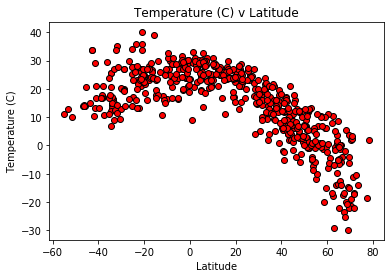

In [26]:
#create scatter plots showing different weather relationships

plt.scatter(lat, max_temp, marker="o", facecolors="red", edgecolors="black")
plt.title("Temperature (C) v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.savefig("WeatherPy\tempvslat.png")
plt.show()


This plot is analyzing if there is any relationship between temperature and latitude. 

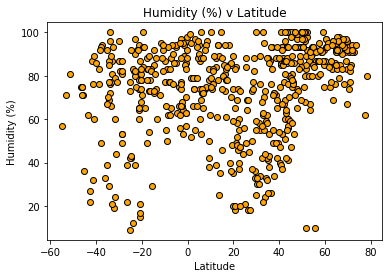

In [27]:
plt.scatter(lat, humidity, marker="o", facecolors="orange", edgecolors="black")
plt.title("Humidity (%) v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("WeatherPy\humidityvslat.png")
plt.show()

This plot is analyzing if there is any relationship between humidity and latitude.  

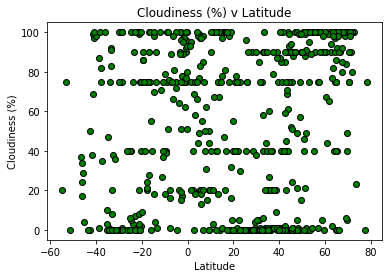

In [40]:
plt.scatter(lat, cloudiness, marker="o", facecolors="green", edgecolors="black")
plt.title("Cloudiness (%) v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("WeatherPy\cloudsvslat.png")
plt.show()

This plot is analyzing if there is any relationship between cloudiness and latitude.

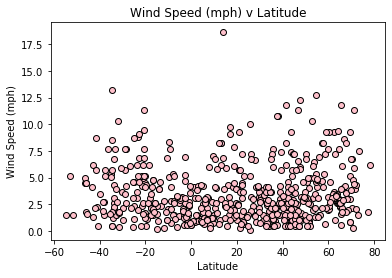

In [41]:
plt.scatter(lat, wind_speed, marker="o", facecolors="pink", edgecolors="black")
plt.title("Wind Speed (mph) v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("WeatherPy\windvslat.png")
plt.show()

This plot is analyzing if there is any relationship between wind speed and latitude.

In [46]:


# #linear regression for temperature vs latitude
# x_values = weather_df['Latitude' <= 0]
# y_values = weather_df['Temperature']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values, y_values)
# plt.plot(lat,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Temperature (C)')
# plt.show()

TypeError: '<=' not supported between instances of 'str' and 'int'